<a href="https://colab.research.google.com/github/nikhils10/Multivariate-Analysis--Oil-Price-Prediction-Using-LSTM-GRU-/blob/master/Multivariate_Oil_Price_Prediction_Using_LSTM_%26_GRU_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Multivariate Analysis & Stock Price Prediction Using  LSTM**

**Problem Type** : Multivariate Forecasting

**Actionable Decision :** Whether to Invest or Not in the Commodity 

Importing and installing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#import plotly.express as px
from scipy.stats import zscore as zs
from scipy import linalg as scipy_linalg
from sklearn.model_selection import train_test_split as split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
# from google.colab import files
from tensorflow.keras.optimizers import SGD
from IPython.display import display, Image


In [9]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

# Loading Data


FNGU->  Micro Fang ETF

SPY->  SP 500 ETF

^VIX->  Volatility Index

UCO->  Crude Oil ETF

IEF->  US 10Y Bond ETF

^DJI->  Dow Jones Industrial Average Index
 

In [32]:
from pandas_datareader import data as web
tickers = ['FNGU', 'SPY', '^VIX', 'UCO', 'IEF', '^DJI']
df = web.DataReader(tickers, data_source='yahoo', start='2020-01-01', end='2022-12-31')

In [33]:
df['Open']

Symbols,FNGU,SPY,^VIX,UCO,IEF,^DJI
Date,,,,,,
2020-01-02,6.212000,323.540009,13.460000,510.750000,110.690002,28638.970703
2020-01-03,6.300000,321.160004,15.010000,548.000000,111.150002,28553.330078
2020-01-06,6.139000,320.489990,15.450000,551.750000,111.660004,28465.500000
2020-01-07,6.680000,323.019989,13.840000,535.750000,111.330002,28639.179688
2020-01-08,6.731000,322.940002,15.160000,532.500000,111.290001,28556.140625
...,...,...,...,...,...,...
2022-03-15,13.350000,419.769989,33.130001,135.509995,109.739998,32989.269531
2022-03-16,16.000000,429.890015,29.020000,140.800003,109.000000,33653.929688
2022-03-17,18.020000,433.589996,26.510000,145.750000,109.029999,33995.390625


# Exploratory Data Analysis(EDA)

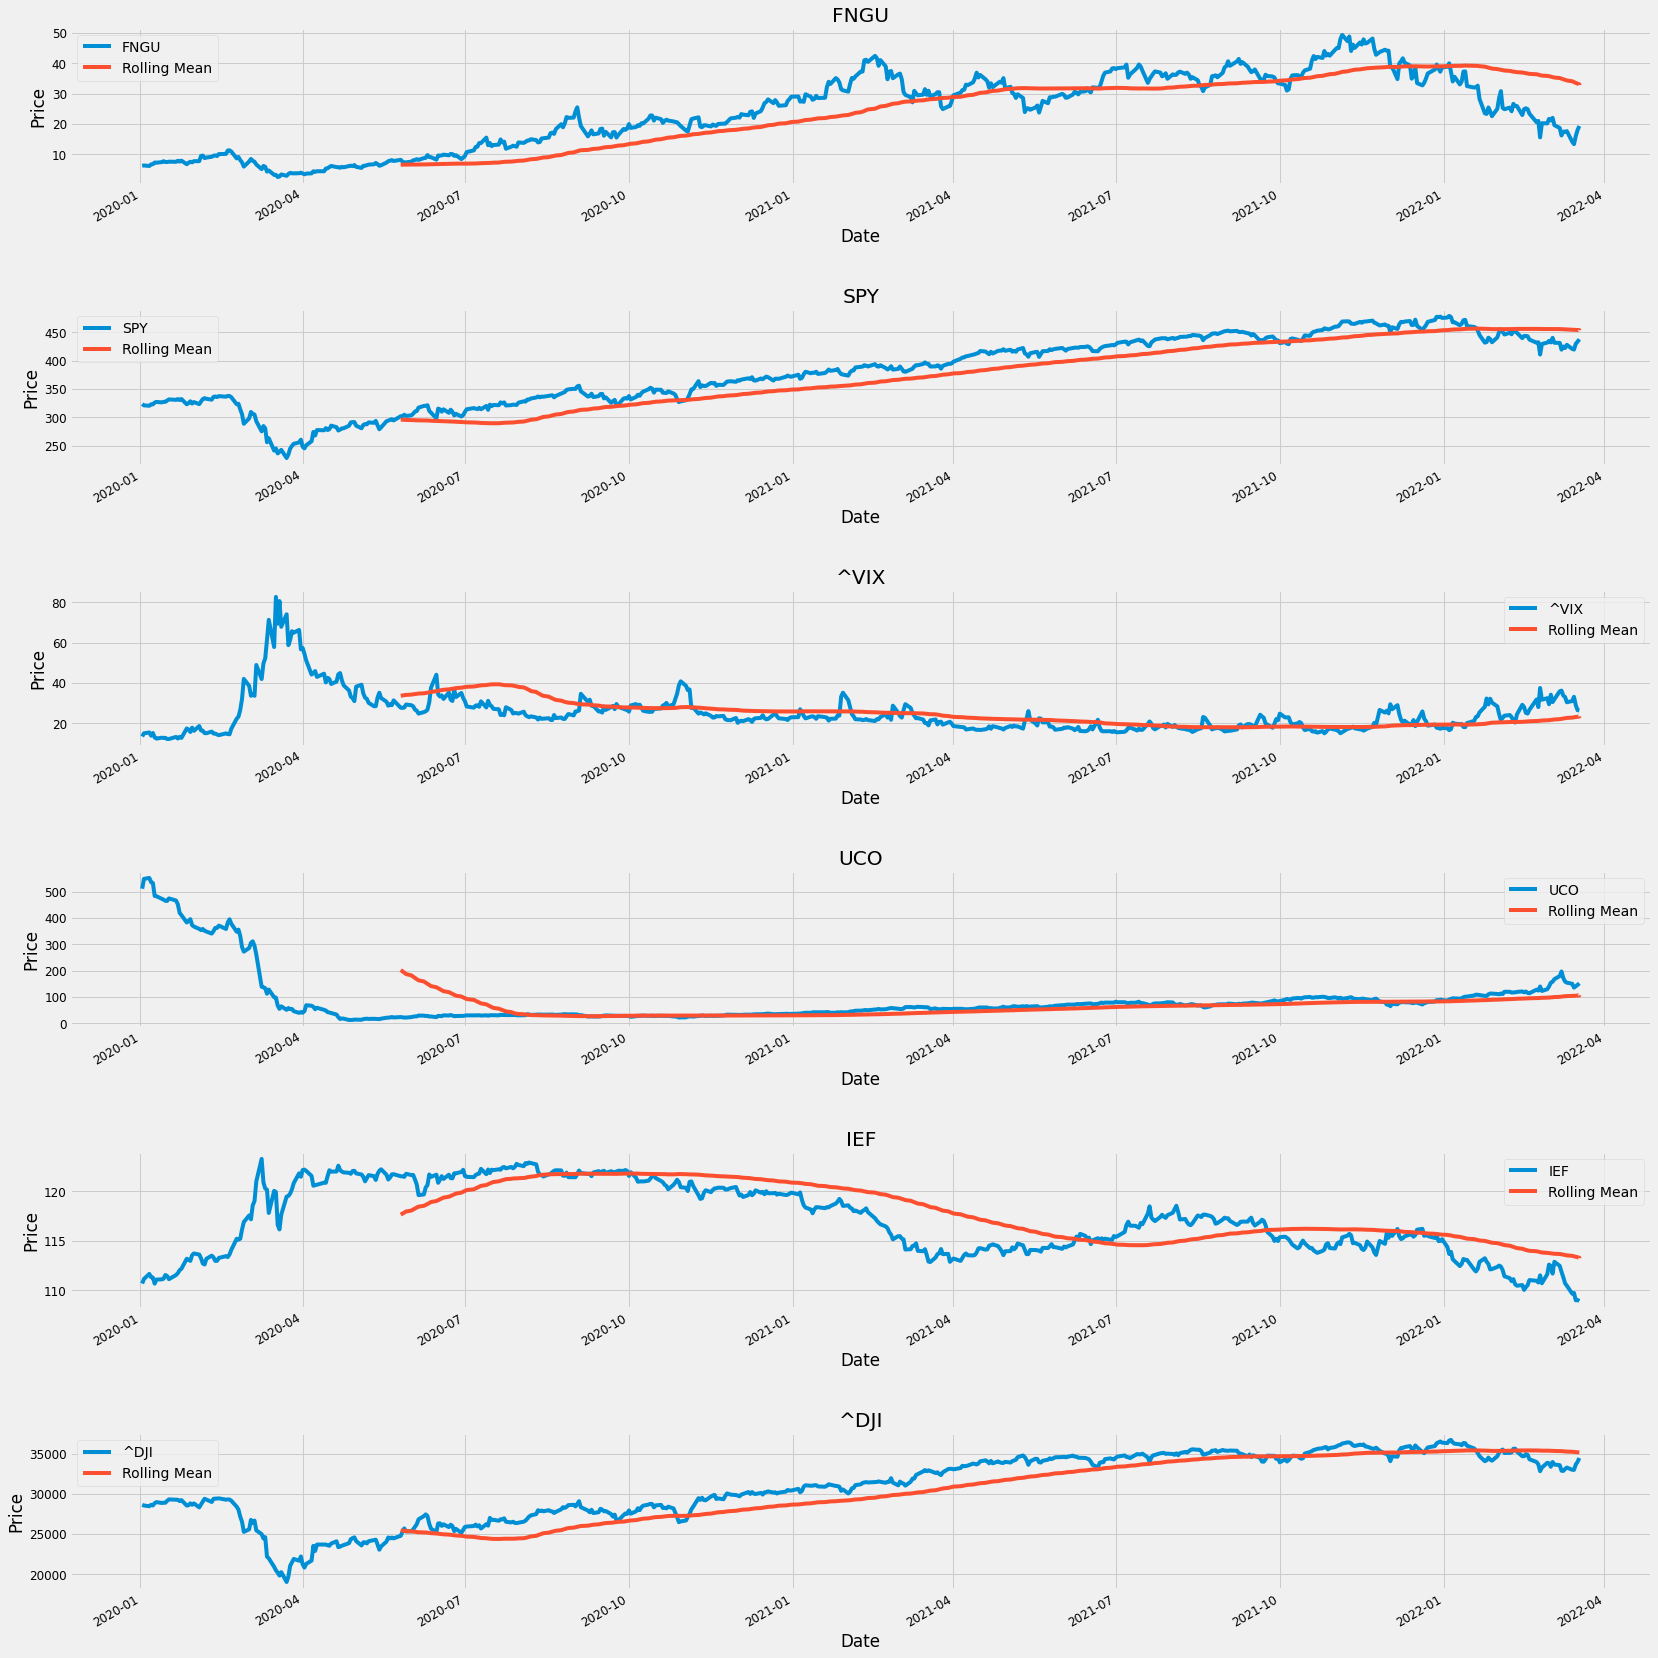

In [34]:
##Line Plots Target & Features
data = df['Open']
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

Inferences :-



C:\Users\ykchi\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ykchi\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ykchi\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

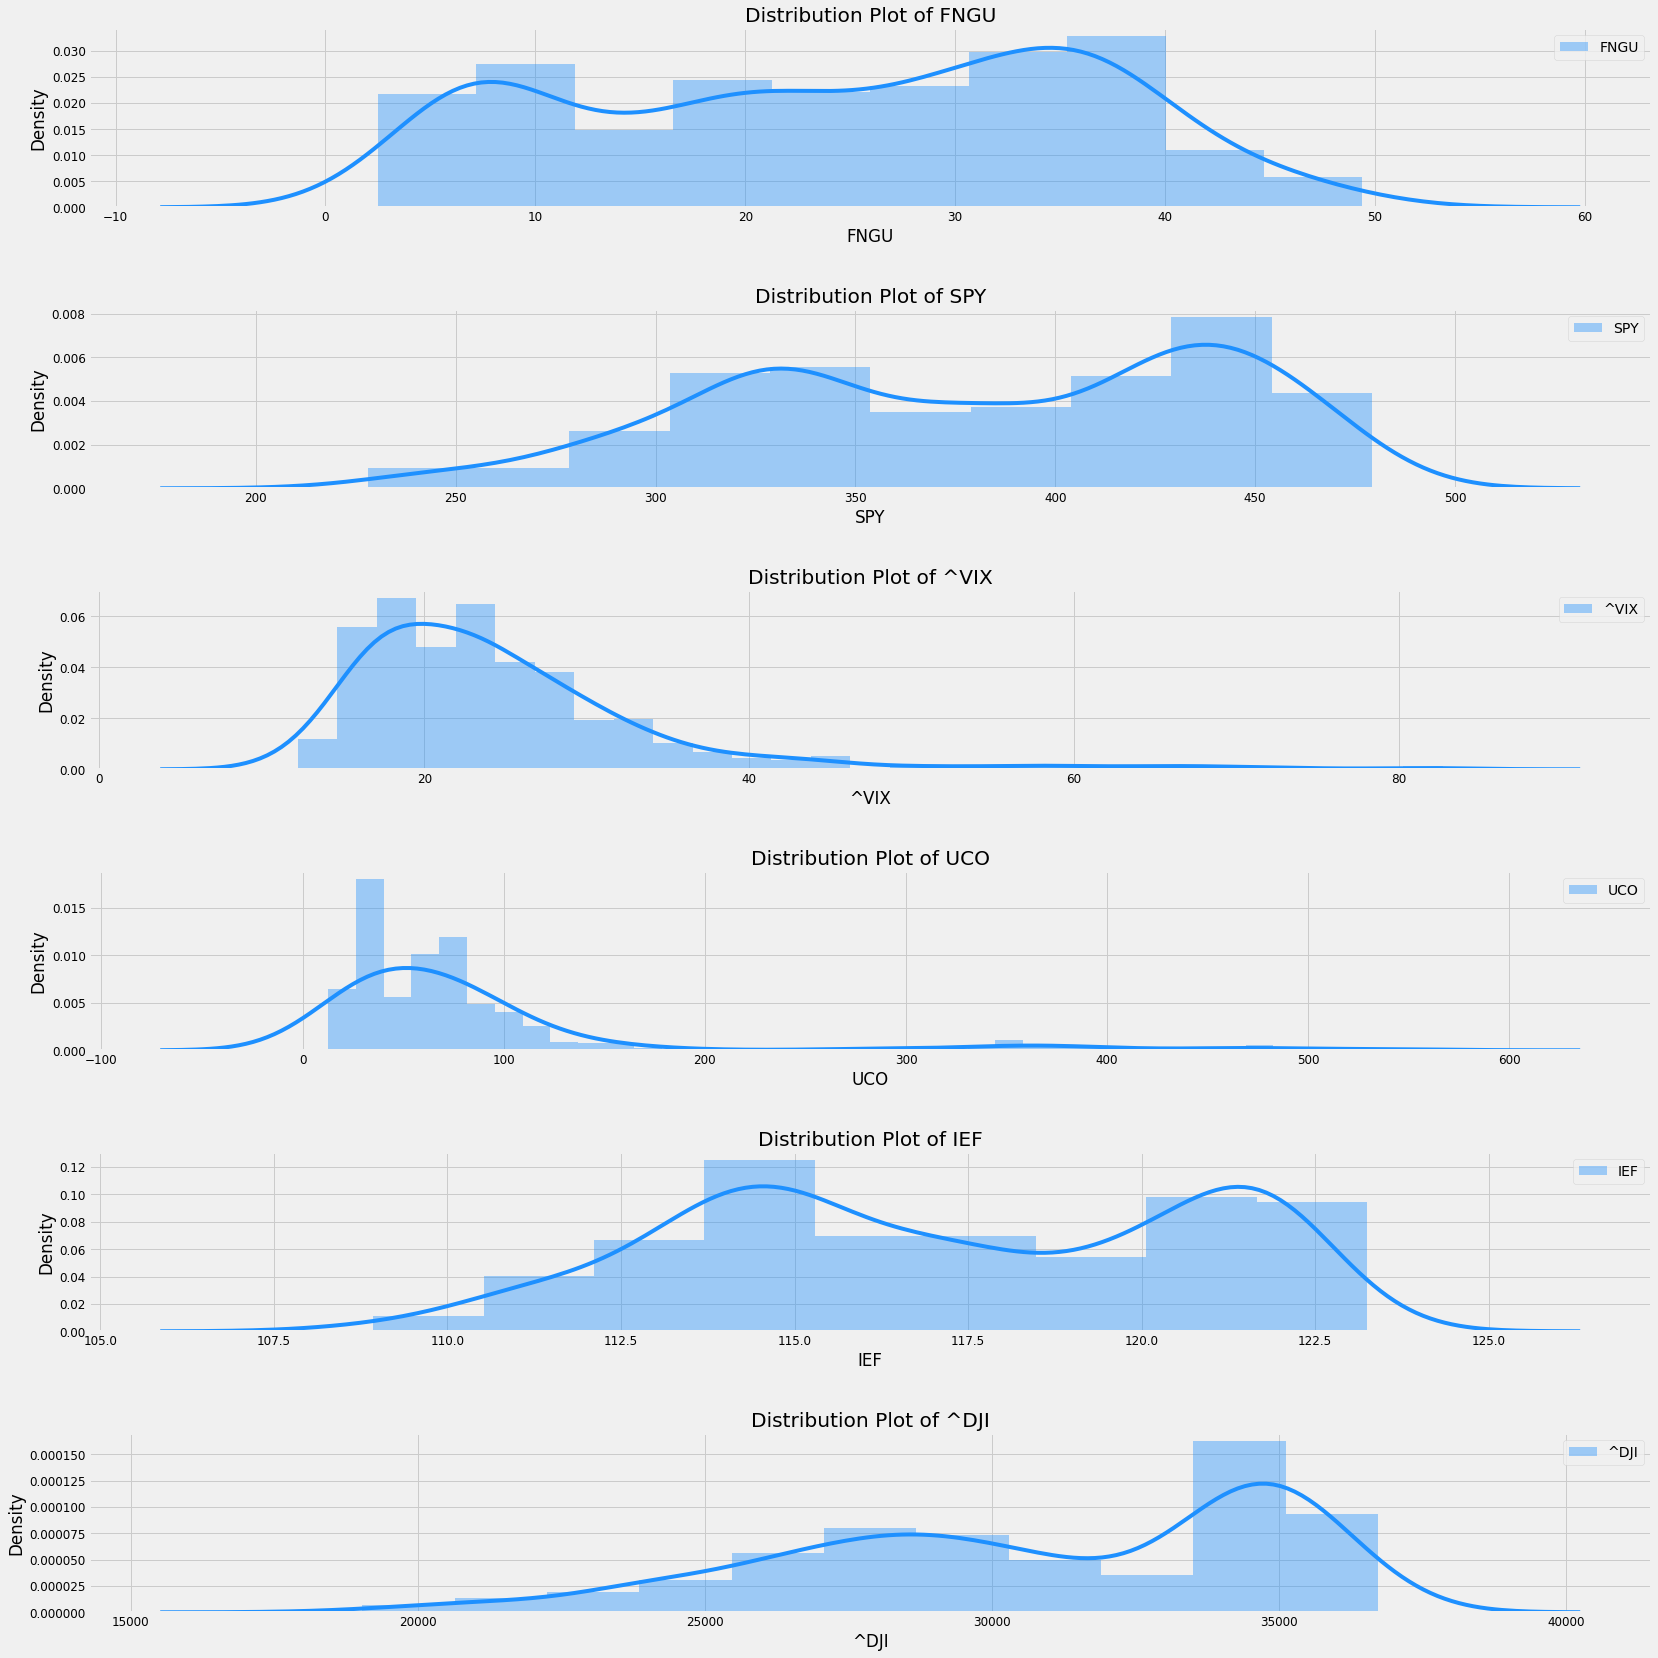

In [35]:
##Checking if Target and Features follow Normal Distribution
data = df['Open']
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
col_names = data.columns
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
  ax.tick_params(labelsize=12)
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()


From above Distribution plots :-

-> 

-> 

-> 

In [36]:
## Temporary DataFrame
temp_data = df['Open']
temp_data['Year'] = df.index.year

<ipython-input-36-3493d34f73ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['Year'] = df.index.year


-> The above Lag plot indicates that WTI has good positive correlation with each of its lagging orders.

-> This kind of series is good for time series as its showing auto-regressive nature.

**Bivariate Analysis (Stock and Features)**

In [37]:
##Scaling Data to Observe Bivariate Analysis 
sc = MinMaxScaler(feature_range=(0,1))
oil_df_scaled= sc.fit_transform(df['Open'])

Since distribution is not normal we use Standardisation instead of Normalization.

In [38]:
##Scaled Data Glimse
oil_df_scaled[:2]

array([[0.07912748, 0.37983511, 0.01787488, 0.92394591, 0.12290518,
        0.54314908],
       [0.08100386, 0.37035415, 0.03986381, 0.99304383, 0.15502802,
        0.53830905]])

In [39]:
##Comparing Movement of WTI wrt to Features
col_names = data.columns[1:]
scaled_features = oil_df_scaled[:,1:]
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
 

<Figure size 1728x1728 with 0 Axes>

Inferences From Bivariate Feature Analysis :-

 


**Multivariate Analysis**

In [40]:
#fig = px.parallel_coordinates(oil_df,color='WTI',color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Parallel Co-ordinates Plot')

#fig.show()

IndentationError: unexpected indent (<ipython-input-40-ac81a1bdd68a>, line 2)

In [41]:
##To display on Github Viewer
#display(Image(filename='/content/drive/My Drive/GitHub Projects/LSTM Oil Price/parallel plots img.png'))

Inferences From Parallel Co-ordinates Plot :-

->The higher values of WTI correpond to average values for GOLD,US 10 YR BOND,DJU. (Red shaded Path)

->Low Values of WTI correspond to High Values of US Dollar Index(Dark Green Shaded Path).


Since Target & Feature don't follow normal distribution , we will use
**Spearman Correlation**.


**HeatMap**

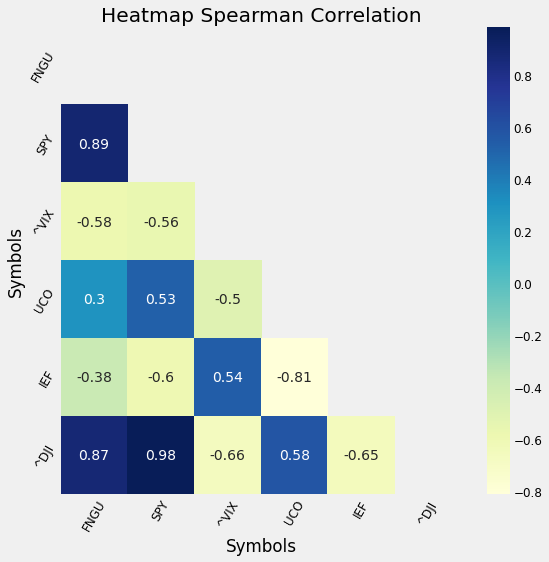

In [42]:
##HeatMap Spearman Correlation
plt.figure(figsize=(8,8))
matrix = np.triu(df['Open'].corr(method='spearman'))
heat_map = sns.heatmap(df['Open'].corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')

In [43]:
##Spearman Correlation In Tabular Form
df['Open'].corr(method='spearman')

Symbols,FNGU,SPY,^VIX,UCO,IEF,^DJI
Symbols,,,,,,
FNGU,1.000000,0.887570,-0.581839,0.300929,-0.378216,0.874433
SPY,0.887570,1.000000,-0.562542,0.528158,-0.597440,0.983326
^VIX,-0.581839,-0.562542,1.000000,-0.496657,0.539030,-0.659065
UCO,0.300929,0.528158,-0.496657,1.000000,-0.809203,0.582080
IEF,-0.378216,-0.597440,0.539030,-0.809203,1.000000,-0.650704
^DJI,0.874433,0.983326,-0.659065,0.582080,-0.650704,1.000000


# Feature Selection
We eliminate features by Filteration technique and use correlation factor .
->We eliminate all features having spearman correlation less than magnitude of 
0.4.  
->We remove SP 500 and US 10 YR Bond ,we also thereby eliminate Multicollinearity present among (SP 500 & DJU),(US 10 YR BOND & DJU),(GOLD & DJU).

Features remaining : WTI ,GOLD , US DOLLAR INDEX.
Since this is time series problem even WTI will be included as a feature as it is a autoregressive problem.

In [45]:
##Feature Selection
after_fs = df['Open'][['FNGU','UCO','IEF']]
after_fs.head(3)

Symbols,FNGU,UCO,IEF
Date,,,
2020-01-02,6.212,510.75,110.690002
2020-01-03,6.300,548.00,111.150002
2020-01-06,6.139,551.75,111.660004


# **Outlier Elimination**

**(Method-1) Financial Crisis Outlier Removal (2007-2009)**

In [46]:
before_2007 = after_fs['2000-01':'2007-06']
after_2009 = after_fs['2009-06':'2019-06']
fin_out = pd.concat([before_2007,after_2009],axis=0)
fin_out.shape

(0, 3)

We observed financial crisis from 2007 to 2009.
We remove data points from mid of 2007 to mid of 2019 as this was a big crisis and led to lot of volatality of oil price movement as observed earlier.
We eliminated 482 outliers.

**(Method-2) Z-Score Outlier Removal Technique**

We can use Z-scores to detect outliers by calculating how many standard deviations away is a point from the mean.

In [47]:
zscore = np.abs(zs(after_fs['FNGU']))
zscore_df = after_fs.copy()
zscore_df['zscore'] = zscore
zscore_df.head(5)

Symbols,FNGU,UCO,IEF,zscore
Date,,,,
2020-01-02,6.212,510.75,110.690002,1.471512
2020-01-03,6.300,548.00,111.150002,1.464326
2020-01-06,6.139,551.75,111.660004,1.477474
2020-01-07,6.680,535.75,111.330002,1.433293
2020-01-08,6.731,532.50,111.290001,1.429128


In [48]:
##Considering Outliers of more than +-2.5 zscore as outliers
len(zscore_df[zscore_df['zscore']>2.5])

0

In [50]:
zscore_df = zscore_df.loc[zscore_df['zscore']<2.5,['FNGU','UCO','IEF']]
zscore_df.shape

(559, 3)

We considered all points of more than 2.5 times away from mean as outliers and removed 37 datapoints.
Z-score can be calculated on univariate series so we used it on our target variable WTI and removed corresponding points.

**(Method-3) Mahalanobis Distance Outlier Removal Technique**

Mahalanobis distance is distance between two points in a multivariate space. It can be effectively used to eliminate outliers when :-

-> There is correlation with target variable.
 
-> Multi-dimensional distance is possible otherwise not possible in Euclidean distance. 

In [51]:
## Citing Source : https://www.machinelearningplus.com/statistics/mahalanobis-distance/
##Outlier Removal Method-3-Mahalanobis Distance
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy_linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()


In [52]:
mah_df = after_fs.copy()
mah_df['Mahalanobis'] = mahalanobis(x=mah_df, data=mah_df)
mah_df.head(3)

Symbols,FNGU,UCO,IEF,Mahalanobis
Date,,,,
2020-01-02,6.212,510.75,110.690002,18.912490
2020-01-03,6.300,548.00,111.150002,23.285386
2020-01-06,6.139,551.75,111.660004,24.304247


C:\Users\ykchi\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mahalanobis', ylabel='Density'>

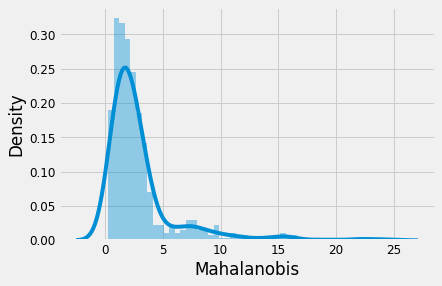

In [53]:
sns.distplot(mah_df['Mahalanobis'])

In [54]:
##We consider points with Mahalanobis distance greater than 8 to be outliers.
len(mah_df[mah_df['Mahalanobis']>8])

40

We removed 145 datapoints by using Mahalanobis distance.

# Data Preparation for Modelling 

**Train-Test Split**

In [55]:
z_train,z_test = split(zscore_df,train_size=0.7,shuffle=False) 

In [56]:
print('Zscore Dataset')
print(z_train.shape)
print(z_test.shape)

Zscore Dataset
(391, 3)
(168, 3)


**Scaling Data for Model**

In [57]:
##We need 2 scalers per model -Train and Test require different scalers
sc1 = MinMaxScaler(feature_range=(0,1))
sc2 = MinMaxScaler(feature_range=(0,1))

We will carry out Standardisation after train-test split to prevent overfitting.

LSTM /GRU stores data by taking in number of  timesteps for 1 output. So suppose we give 60 timesteps , that means for 61st day the model considers 1-60 days for sequence and so on.


In [58]:
##Function to Prepare Training Data for LSTM
def prepare_train_data_lstm(scaler,train_data,n_dim):
  input_data = scaler.fit_transform(train_data.values)
  print('Shape of Input Data Initially',input_data.shape)
  timesteps = 60
  global X1
  X1 = []
  global y1
  y1=[]
  for i in range(len(input_data)-timesteps-1):
    t=[]
    for j in range(0,timesteps):        
      
        t.append(input_data[[(i+j)], :])
    X1.append(t)
    y1.append(input_data[i+ timesteps,0])
  
  X1, y1= np.array(X1), np.array(y1)
  print('Shape of Train Part after transformation',X1.shape)
  print('Shape of Test Part after transformation ',y1.shape)
  
  X1 = X1.reshape(X1.shape[0],timesteps, n_dim)
  print('Final Shape ',X1.shape)
  return X1,y1

In [59]:
##LSTM Model Function
def lstm_model(scaler,train_data,n_dim):
    #initialize model
    prepare_train_data_lstm(scaler,train_data,n_dim)

    global model
    model = Sequential()

    #layer 1 of LSTM
    model.add(LSTM(units=30,return_sequences=True,input_shape=(X1.shape[1],n_dim)))
    model.add(Dropout(0.2))

    #layer 2 of LSTM
    model.add(LSTM(units=30,return_sequences=True))
    model.add(Dropout(0.2))

    #layer 3 of LSTM
    model.add(LSTM(units=30,return_sequences=True))
    model.add(Dropout(0.2))

    #layer 4 of LSTM
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))

    #Output layer of model
    model.add(Dense(units=1))

    optimizer = tf.keras.optimizers.Adam(lr=2e-5)
    #compiling the model
    model.compile(optimizer=optimizer,loss='mean_squared_error')
    model.fit(X1, y1, epochs=50, batch_size=32)

In [60]:
##Function to Prepare Test Data
def prepare_test_data_lstm(scaler,test_data,n_dim):
  inputs = scaler.transform(test_data.values)
  global X_test
  X_test = []
  timesteps = 60
  for i in range(len(inputs)-timesteps-1):
      t=[]
      for j in range(0,timesteps):
        
          t.append(inputs[[(i+j)], :])
      X_test.append(t)
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_dim))
  print('Shape of Test Dataset',X_test.shape)

In [61]:
##Function to Predict Data
def predict_data(model_name,scaler_pred,test_data,X_test,Outlier_method,n_dim):
  
  pred = model_name.predict(X_test)
  print(len(test_data[61:]))
  set_scale = scaler_pred.fit_transform(test_data.iloc[61:,0].values.reshape(-1,1))
  pred_descale = scaler_pred.inverse_transform(pred)
  global pred_df
  pred_df = pd.DataFrame(pred_descale,columns=['Predicted -'+str(Outlier_method)])
  return pred_df

In [62]:
##Function to Calculate Result Metrics
def result_metrics_forecast(test_series,forecast_series,model_name,out_name):
  print('Result Metrics for ' +  str(model_name) + ' -{} Outlier Removal Technique'.format(out_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
  fig = plt.figure(figsize=(10,10))
  plt.plot(test_series.index,test_series,label='Actual')
  plt.plot(test_series.index,forecast_series,label='Predicted')
  plt.title(str(model_name) + ' -Forecasting Using {} Outlier Removal Technique'.format(out_name))
  plt.ylabel('Price')
  plt.legend()

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'loss',patience = 20)
X1,y1 = prepare_train_data_lstm(sc1,z_train,3)

Shape of Input Data Initially (391, 3)
Shape of Train Part after transformation (330, 60, 1, 3)
Shape of Test Part after transformation  (330,)
Final Shape  (330, 60, 3)


In [64]:
""" 
About this model : -
3 Layers of LSTM 
1 Hidden Layer
Output Layer- learning rate is being optimized 
Optimizer function is Adam
""" 
import tensorflow as tf

## 4 layers of LSTM Model
model_simple = Sequential()
 
#layer 1 of LSTM
model_simple.add(LSTM(units=64,return_sequences=True,input_shape=(X1.shape[1],3)))
model_simple.add(Dropout(0.2))

#layer 2 of LSTM
model_simple.add(LSTM(units=32,return_sequences=True,input_shape=(X1.shape[1],3)))
model_simple.add(Dropout(0.2))

#layer 3 of LSTM
model_simple.add(LSTM(units=32,return_sequences=True,input_shape=(X1.shape[1],3)))
model_simple.add(Dropout(0.2))

#layer 4 of LSTM
model_simple.add(LSTM(units=16,input_shape=(X1.shape[1],3)))
model_simple.add(Dropout(0.2))

##Hidden Layer 
model_simple.add(Dense(units=16))
#Output layer of model
model_simple.add(Dense(units=1))


#compiling the model
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 10))
optimizer = tf.keras.optimizers.Adam(lr=1e-8)
model_simple.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])

##Model Fit
history_simple = model_simple.fit(X1, y1, epochs=200, batch_size=32,callbacks=[lr_schedule],validation_split=0.3,shuffle=False)

C:\Users\ykchi\miniconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
8/8 [==============================] - 13s 459ms/step - loss: 0.0995 - mae: 0.3618 - val_loss: 0.3068 - val_mae: 0.7769 - lr: 1.0000e-08
Epoch 2/200
8/8 [==============================] - 1s 108ms/step - loss: 0.0994 - mae: 0.3615 - val_loss: 0.3067 - val_mae: 0.7769 - lr: 1.2589e-08
Epoch 3/200
8/8 [==============================] - 1s 109ms/step - loss: 0.0982 - mae: 0.3599 - val_loss: 0.3067 - val_mae: 0.7769 - lr: 1.5849e-08
Epoch 4/200
8/8 [==============================] - 1s 114ms/step - loss: 0.1011 - mae: 0.3672 - val_loss: 0.3067 - val_mae: 0.7769 - lr: 1.9953e-08
Epoch 5/200
8/8 [==============================] - 1s 110ms/step - loss: 0.1003 - mae: 0.3640 - val_loss: 0.3067 - val_mae: 0.7769 - lr: 2.5119e-08
Epoch 6/200
8/8 [==============================] - 1s 109ms/step - loss: 0.1001 - mae: 0.3635 - val_loss: 0.3067 - val_mae: 0.7769 - lr: 3.1623e-08
Epoch 7/200
8/8 [==============================] - 1s 110ms/step - loss: 0.1008 - mae: 0.3660 - val_loss: 0.306

8/8 [==============================] - 1s 108ms/step - loss: 0.0409 - mae: 0.2496 - val_loss: 0.0301 - val_mae: 0.2228 - lr: 0.0032
Epoch 57/200
8/8 [==============================] - 1s 108ms/step - loss: 0.0131 - mae: 0.1447 - val_loss: 0.0095 - val_mae: 0.1125 - lr: 0.0040
Epoch 58/200
8/8 [==============================] - 1s 108ms/step - loss: 0.0088 - mae: 0.1091 - val_loss: 0.0106 - val_mae: 0.1181 - lr: 0.0050
Epoch 59/200
8/8 [==============================] - 1s 108ms/step - loss: 0.0256 - mae: 0.1975 - val_loss: 0.0067 - val_mae: 0.0919 - lr: 0.0063
Epoch 60/200
8/8 [==============================] - 1s 108ms/step - loss: 0.0496 - mae: 0.2690 - val_loss: 0.0189 - val_mae: 0.1699 - lr: 0.0079
Epoch 61/200
8/8 [==============================] - 1s 107ms/step - loss: 0.0096 - mae: 0.1163 - val_loss: 0.0071 - val_mae: 0.0964 - lr: 0.0100
Epoch 62/200
8/8 [==============================] - 1s 107ms/step - loss: 0.0765 - mae: 0.3040 - val_loss: 0.0116 - val_mae: 0.1282 - lr: 0.012

Epoch 110/200
8/8 [==============================] - 1s 111ms/step - loss: 2428026.7500 - mae: 2428027.0000 - val_loss: 5545158.0000 - val_mae: 5545158.0000 - lr: 794.3282
Epoch 111/200
8/8 [==============================] - 1s 111ms/step - loss: 4114590.5000 - mae: 4114591.2500 - val_loss: 12809747.0000 - val_mae: 12809747.0000 - lr: 1000.0000
Epoch 112/200
8/8 [==============================] - 1s 112ms/step - loss: 20760600.0000 - mae: 20760600.0000 - val_loss: 30036472.0000 - val_mae: 30036472.0000 - lr: 1258.9254
Epoch 113/200
8/8 [==============================] - 1s 111ms/step - loss: 15882733.0000 - mae: 15882733.0000 - val_loss: 15041683.0000 - val_mae: 15041683.0000 - lr: 1584.8932
Epoch 114/200
8/8 [==============================] - 1s 113ms/step - loss: 18169980.0000 - mae: 18169980.0000 - val_loss: 36309264.0000 - val_mae: 36309264.0000 - lr: 1995.2623
Epoch 115/200
8/8 [==============================] - 1s 111ms/step - loss: 92687200.0000 - mae: 92687200.0000 - val_loss: 

8/8 [==============================] - 1s 113ms/step - loss: 6953020013150208.0000 - mae: 6953020013150208.0000 - val_loss: 10104109206077440.0000 - val_mae: 10104109206077440.0000 - lr: 12589254.0000
Epoch 153/200
8/8 [==============================] - 1s 112ms/step - loss: 4030773120204800.0000 - mae: 4030773120204800.0000 - val_loss: 4224009067560960.0000 - val_mae: 4224009067560960.0000 - lr: 15848932.0000
Epoch 154/200
8/8 [==============================] - 1s 118ms/step - loss: 6930506331455488.0000 - mae: 6930506331455488.0000 - val_loss: 1566968888950784.0000 - val_mae: 1566968888950784.0000 - lr: 19952624.0000
Epoch 155/200
8/8 [==============================] - 1s 129ms/step - loss: 9350623765987328.0000 - mae: 9350623765987328.0000 - val_loss: 7271199780372480.0000 - val_mae: 7271199780372480.0000 - lr: 25118864.0000
Epoch 156/200
8/8 [==============================] - 1s 127ms/step - loss: 17898565388992512.0000 - mae: 17898565388992512.0000 - val_loss: 25094529690370048.00

Epoch 188/200
8/8 [==============================] - 1s 128ms/step - loss: 20144168787664001040384.0000 - mae: 20144168787664001040384.0000 - val_loss: 24890494420551257292800.0000 - val_mae: 24890494420551257292800.0000 - lr: 50118721536.0000
Epoch 189/200
8/8 [==============================] - 1s 128ms/step - loss: 41547395412353089536000.0000 - mae: 41547395412353089536000.0000 - val_loss: 1387693590231717511168.0000 - val_mae: 1387693590231717511168.0000 - lr: 63095734272.0000
Epoch 190/200
8/8 [==============================] - 1s 112ms/step - loss: 56559338625859338633216.0000 - mae: 56559338625859338633216.0000 - val_loss: 59497113223986778472448.0000 - val_mae: 59497113223986778472448.0000 - lr: 79432826880.0000
Epoch 191/200
8/8 [==============================] - 1s 125ms/step - loss: 147552866736221064265728.0000 - mae: 147552866736221064265728.0000 - val_loss: 418055714667515070119936.0000 - val_mae: 418055714667515070119936.0000 - lr: 99999997952.0000
Epoch 192/200
8/8 [===

Text(0.5, 1.0, 'Learning Rate vs Loss')

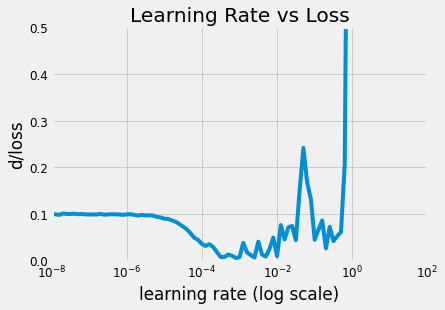

In [65]:
plt.semilogx(history_simple.history["lr"], history_simple.history["loss"])
plt.axis([1e-8, 100, 0, 60])
plt.ylim(0,0.5)
plt.ylabel("d/loss")
plt.xlabel("learning rate (log scale)")
plt.title('Learning Rate vs Loss')

(1e-05, 100)

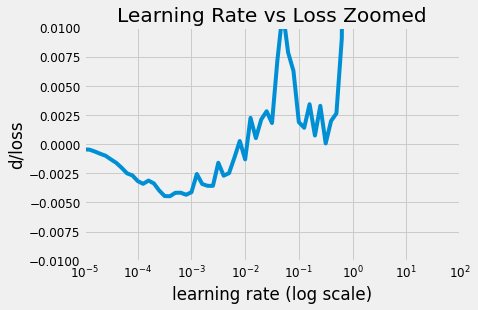

In [66]:
sma=20
n_skip=20
y_lim=(-0.01,0.01)
"""
Plots rate of change of the loss function.
    Parameters:
        sched - learning rate scheduler, an instance of LR_Finder class.
        sma - number of batches for simple moving average to smooth out the curve.
        n_skip - number of batches to skip on the left.
        y_lim - limits for the y axis.
    """
derivatives = [0] * (sma + 1)
for i in range(1 + sma,200):
  derivative = (history_simple.history["loss"][i] - history_simple.history["loss"][i - sma]) / sma
  derivatives.append(derivative)
        
plt.ylabel("d/loss")
plt.xlabel("learning rate (log scale)")
plt.title('Learning Rate vs Loss Zoomed')
plt.plot(history_simple.history["lr"][20:], derivatives[20:])
plt.xscale('log')
plt.ylim(y_lim)
plt.xlim(1e-5,100)

Zooming in into learning rate vs Epoch graph and finind optimal learning rate for our model.

**We take the learning rate where the loss is the minimum.
The optimal learning rate looks to be around 2e-5.**

Tuning learning rate is the most important parameter .

In [67]:
##8e-4 is the optimal learning rate.
## 4 layers of LSTM Model
model_simple = Sequential()
#layer 1 of LSTM
model_simple.add(LSTM(units=64,return_sequences=True,input_shape=(X1.shape[1],3)))
model_simple.add(Dropout(0.2))

#layer 2 of LSTM
model_simple.add(LSTM(units=32,return_sequences=True,input_shape=(X1.shape[1],3)))
model_simple.add(Dropout(0.2))

#layer 3 of LSTM
model_simple.add(LSTM(units=32,return_sequences=True,input_shape=(X1.shape[1],3)))
model_simple.add(Dropout(0.2))

#layer 4 of LSTM
model_simple.add(LSTM(units=16,input_shape=(X1.shape[1],3)))
model_simple.add(Dropout(0.2))

##Hidden Layer 
model_simple.add(Dense(units=16))
#Output layer of model
model_simple.add(Dense(units=1))

#compiling the model

optimizer = tf.keras.optimizers.Adam(lr=2e-5)
model_simple.compile(loss=tf.keras.losses.MSE,
              optimizer=optimizer)

history_simple = model_simple.fit(X1, y1, epochs=40, batch_size=32,validation_split=0.3,shuffle=False)

Epoch 1/40
8/8 [==============================] - 17s 562ms/step - loss: 0.2355 - val_loss: 0.5577
Epoch 2/40
8/8 [==============================] - 1s 106ms/step - loss: 0.2185 - val_loss: 0.5306
Epoch 3/40
8/8 [==============================] - 1s 107ms/step - loss: 0.2014 - val_loss: 0.5046
Epoch 4/40
8/8 [==============================] - 1s 107ms/step - loss: 0.1859 - val_loss: 0.4797
Epoch 5/40
8/8 [==============================] - 1s 122ms/step - loss: 0.1691 - val_loss: 0.4556
Epoch 6/40
8/8 [==============================] - 1s 121ms/step - loss: 0.1547 - val_loss: 0.4329
Epoch 7/40
8/8 [==============================] - 1s 121ms/step - loss: 0.1435 - val_loss: 0.4116
Epoch 8/40
8/8 [==============================] - 1s 125ms/step - loss: 0.1309 - val_loss: 0.3910
Epoch 9/40
8/8 [==============================] - 1s 118ms/step - loss: 0.1180 - val_loss: 0.3708
Epoch 10/40
8/8 [==============================] - 1s 107ms/step - loss: 0.1117 - val_loss: 0.3514
Epoch 11/40
8/8 [=

<Figure size 432x288 with 0 Axes>

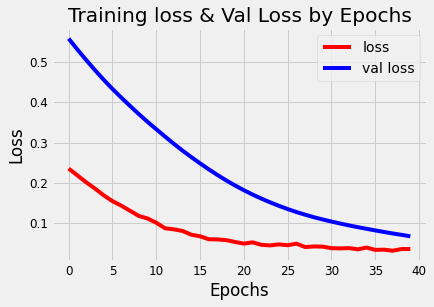

<Figure size 432x288 with 0 Axes>

In [68]:
loss=history_simple.history['loss']
val_loss = history_simple.history['val_loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r',label='loss')
plt.plot(epochs,val_loss,'blue',label='val loss')
plt.title('Training loss & Val Loss by Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()

Since both training loss and validation loss are close to each other there seems to be no overfitting .
We notice smooth loss curves which is a good sign .
If there was a lot of jagginess or validation loss decreasing with increasing number of epochs we would be looking at overfitting .
In this case there appears to be no overfitting . 

# Forecasting Using LSTM(Long Term Short Memory)
LSTM are type of Re-current Neural Network with 3 gates (input,output & forget).

In [69]:
##Forecasting For Z-Score Outlier Removed Dataset 
lstm_model(sc1,z_train,3)

Shape of Input Data Initially (391, 3)
Shape of Train Part after transformation (330, 60, 1, 3)
Shape of Test Part after transformation  (330,)
Final Shape  (330, 60, 3)


C:\Users\ykchi\miniconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
11/11 [==============================] - 13s 86ms/step - loss: 0.2613
Epoch 2/50
11/11 [==============================] - 1s 83ms/step - loss: 0.2510
Epoch 3/50
11/11 [==============================] - 1s 85ms/step - loss: 0.2425
Epoch 4/50
11/11 [==============================] - 1s 86ms/step - loss: 0.2324
Epoch 5/50
11/11 [==============================] - 1s 86ms/step - loss: 0.2216
Epoch 6/50
11/11 [==============================] - 1s 88ms/step - loss: 0.2101
Epoch 7/50
11/11 [==============================] - 1s 99ms/step - loss: 0.1970
Epoch 8/50
11/11 [==============================] - 1s 97ms/step - loss: 0.1901
Epoch 9/50
11/11 [==============================] - 1s 98ms/step - loss: 0.1767
Epoch 10/50
11/11 [==============================] - 1s 101ms/step - loss: 0.1678
Epoch 11/50
11/11 [==============================] - 1s 99ms/step - loss: 0.1568
Epoch 12/50
11/11 [==============================] - 1s 90ms/step - loss: 0.1463
Epoch 13/50
11/11 [================

Shape of Input Data Initially (3125, 3)
Shape of Train Part after transformation (3064, 60, 1, 3)
Shape of Test Part after transformation  (3064,)
Final Shape  (3064, 60, 3)

Epoch 1/50
96/96 [==============================] - 1s 15ms/step - loss: 0.0272

Epoch 2/50
96/96 [==============================] - 1s 14ms/step - loss: 0.0064

Epoch 3/50
96/96 [==============================] - 1s 12ms/step - loss: 0.0058

Epoch 4/50
96/96 [==============================] - 1s 13ms/step - loss: 0.0050


In [70]:
prepare_test_data_lstm(sc1,z_test,3)

Shape of Test Dataset (107, 60, 3)


In [71]:
predict_data(model,sc2,z_test,X_test,'Z-Score Outlier',3)

107


,Predicted -Z-Score Outlier
0,41.244114
1,41.162605
2,41.089981
3,41.029903
4,40.986393
...,...
102,31.412695
103,31.096823
104,30.773933
105,30.447378


In [72]:
z_out_pred = pred_df.copy()
z_out_actual = z_test.iloc[61:,0].copy()

Result Metrics for FNGU-LSTM -ZScore Outlier Removal Technique
R2 Score :  -0.012
Mean Squared Error :  103.138
Mean Absolute Error :  8.596


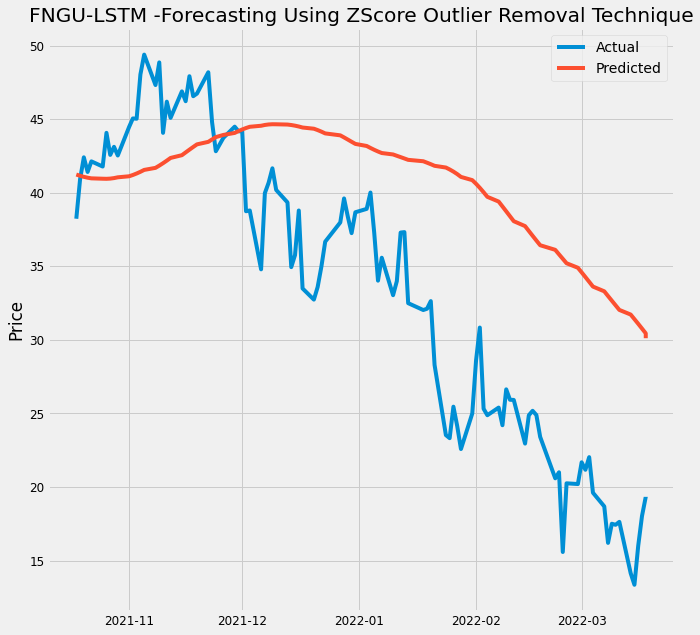

In [73]:
result_metrics_forecast(z_out_actual,z_out_pred,'FNGU-LSTM','ZScore')